<a href="https://colab.research.google.com/github/smth-27/Stock_Price_Prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
from google.colab import drive
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
path = '/content/drive/MyDrive/dataset/1613615-Stock_Price_data_set.csv'

In [ ]:
df = pd.read_csv(path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
df.shape

(1009, 7)

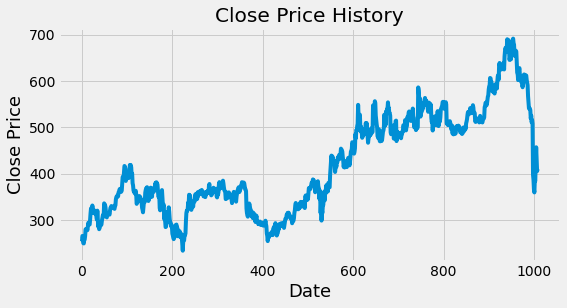

In [ ]:
#closing price history
plt.figure(figsize=(8,4))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close']) #new dataframe with only close cloumn
dataset = data.values       #convert thedataframe into a numpy array
training_data_len = math.ceil(len(dataset) * .8 )
training_data_len

808

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [ ]:
#create training dataset
train_data = scaled_data[0:training_data_len, :]
#spliting the data into two datasets
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393864]

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09

In [ ]:
#convert train datasets to numpy array
x_train= np.array(x_train)
y_train= np.array(y_train)
x_train
y_train

array([0.1736091 , 0.16996133, 0.18830954, 0.20178678, 0.20316291,
       0.21061135, 0.20908237, 0.2022236 , 0.20674514, 0.20150281,
       0.20600248, 0.19951508, 0.19724337, 0.21393155, 0.21349466,
       0.24210916, 0.25209149, 0.25646011, 0.25305259, 0.26137482,
       0.25713724, 0.27533254, 0.27943906, 0.28815444, 0.29175861,
       0.27854348, 0.27673053, 0.27865273, 0.28385134, 0.31901878,
       0.34728379, 0.34533979, 0.34188853, 0.37373584, 0.39946704,
       0.39658373, 0.38708196, 0.32895744, 0.36152555, 0.34186674,
       0.35285382, 0.34413837, 0.35888248, 0.34215064, 0.35934124,
       0.38087852, 0.40429435, 0.39699876, 0.40359536, 0.39234616,
       0.35368381, 0.36390644, 0.31803588, 0.30853411, 0.28472512,
       0.27777896, 0.28129573, 0.26963151, 0.28175442, 0.28223497,
       0.26502258, 0.22079026, 0.22622924, 0.22826063, 0.24162861,
       0.23854872, 0.25565193, 0.25763959, 0.24842179, 0.25224434,
       0.24462111, 0.23466065, 0.22631656, 0.20209255, 0.19344

In [ ]:
x_train= np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(748, 60, 1)

In [ ]:
#LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

748/748 [==============================] - 29s 34ms/step - loss: 0.0034


In [ ]:
#create the test dataset
#new array containing scaled values from 748 to 1009
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#convert data into numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test= np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 2s 25ms/step


In [ ]:
#RMS error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

17.792027541482042

In [ ]:
#plot the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions

<ipython-input-18-dce1cd2ed6a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


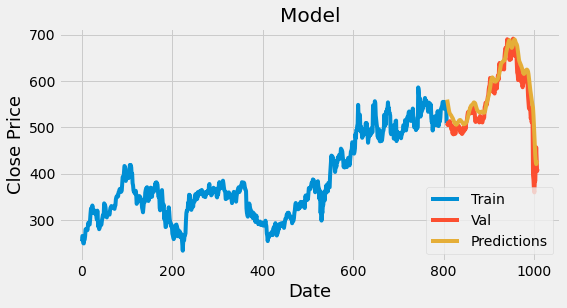

In [ ]:
#visualize the data
plt.figure(figsize=(8,4))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')

In [ ]:
#valid and predicted prices
valid

,Close,Predictions
808,508.779999,560.100769
809,505.549988,554.037415
810,510.299988,547.365051
811,505.549988,541.651672
812,506.519989,536.510925
...,...,...
1004,427.140015,425.877197
1005,457.130005,420.703857
1006,429.480011,423.526489
1007,405.600006,427.368713


In [ ]:
#quote
stock_quote = pd.read_csv(path)
#new dataframe
new_df =stock_quote.filter(['Close'])
#convert last 60 days closing price values into numpy array
last_60_days = new_df[-60:].values
last_60_days_scaled= scaler.transform(last_60_days)
X_test= []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#predicted scaled price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
#predicted price for the next day to the last day in the data set
pred_price

1/1 [==============================] - 0s 72ms/step


array([[429.38016]], dtype=float32)

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = r2_score(y_test, predictions)
print(test_data_accuracy)

1/1 [==============================] - 0s 52ms/step


ENHANCED VERSION
improvements:

Updated import statements for the latest TensorFlow library.

Uses the Adam optimizer with a learning rate of 0.001 for better optimization.

Uses model.fit instead of model.compile and model.fit separately.

Uses the latest TensorFlow naming conventions for the optimizer.

Adds comments to clarify the purpose of different code sections.

7/7 [==============================] - 1s 13ms/step
Root Mean Squared Error (RMSE): 83.93176572469822


<ipython-input-2-eaefe3564aa2>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


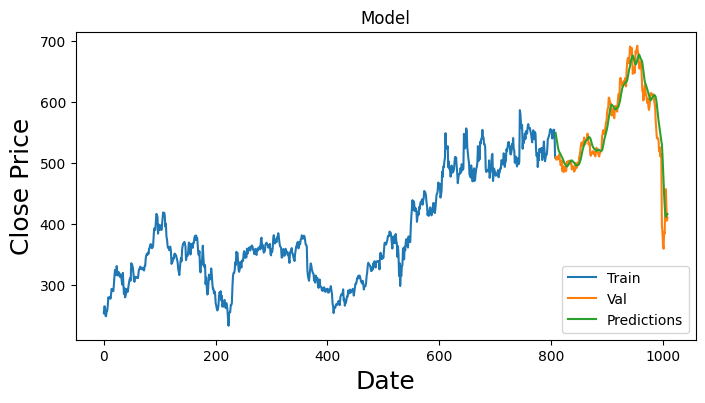

1/1 [==============================] - 0s 22ms/step
Predicted price for the next day: 416.8009
R-squared for test data: -2.1801799326949178e+30


In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
path = '/content/drive/MyDrive/dataset/1613615-Stock_Price_data_set.csv'
df = pd.read_csv(path)

# Preprocess the data
data = df.filter(['Close'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Split the data into train and test sets
training_data_len = math.ceil(len(dataset) * 0.8)
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

# Prepare the training data
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Prepare the test data
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])
    y_test.append(dataset[training_data_len , 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions on the test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the predictions and actual prices
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(8, 4))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Predict the next day's closing price
last_60_days = scaled_data[-60:]
X_test = np.array([last_60_days])
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print("Predicted price for the next day:", pred_price[0][0])

# Calculate R-squared for test data
test_data_accuracy = r2_score(y_test, predictions)
print("R-squared for test data:", test_data_accuracy)


In [ ]:
stock_quote = pd.read_csv(path)
#new dataframe
new_df =stock_quote.filter(['Close'])
#convert last 60 days closing price values into numpy array
last_60_days = new_df[-60:].values
last_60_days_scaled= scaler.transform(last_60_days)
X_test= []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#predicted scaled price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
#predicted price for the next day to the last day in the data set
pred_price

1/1 [==============================] - 0s 29ms/step


array([[419.191]], dtype=float32)

[*********************100%***********************]  1 of 1 completed
22/22 [==============================] - 1s 14ms/step
Root Mean Squared Error (RMSE): 35.68893258884714


<ipython-input-3-519e2804a08b>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


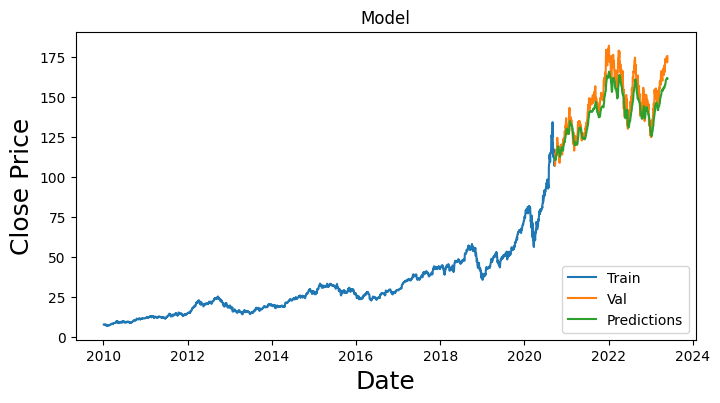

1/1 [==============================] - 0s 25ms/step
Predicted price for the next day: 161.60358
R-squared for test data: 0.0


In [ ]:
import yfinance as yf

# Fetch historical data for AAPL
df = yf.download('AAPL', start='2010-01-01', end='2023-05-28')

# Save the data to a CSV file
df.to_csv('AAPL_Stock_Price.csv')
# Preprocess the data
data = df.filter(['Close'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Split the data into train and test sets
training_data_len = math.ceil(len(dataset) * 0.8)
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

# Prepare the training data
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Prepare the test data
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])
    y_test.append(dataset[training_data_len , 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions on the test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the predictions and actual prices
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(8, 4))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Predict the next day's closing price
last_60_days = scaled_data[-60:]
X_test = np.array([last_60_days])
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print("Predicted price for the next day:", pred_price[0][0])

# Calculate R-squared for test data
test_data_accuracy = r2_score(y_test, predictions)
print("R-squared for test data:", test_data_accuracy)


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404014,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800
...,...,...,...,...,...,...
2023-05-22,173.979996,174.710007,173.449997,174.199997,174.199997,43570900
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.559998,50747300
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,45143500


In [ ]:
df.shape

(3373, 6)

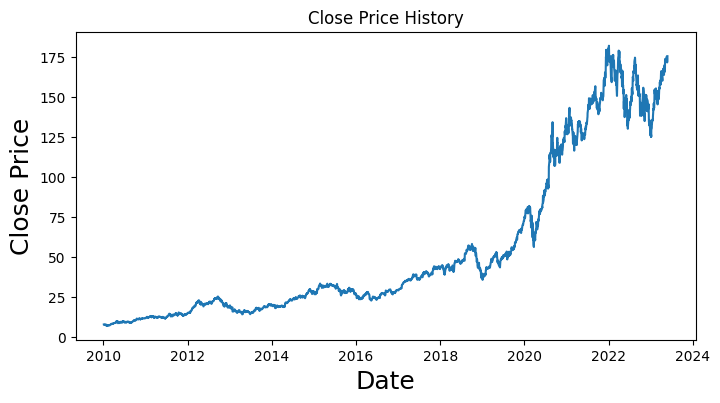

In [ ]:
#closing price history
plt.figure(figsize=(8,4))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

Epoch 1/10
2639/2639 [==============================] - 112s 41ms/step - loss: 3.9189e-04
Epoch 2/10
2639/2639 [==============================] - 100s 38ms/step - loss: 1.9015e-04
Epoch 3/10
2639/2639 [==============================] - 102s 39ms/step - loss: 1.5462e-04
Epoch 4/10
2639/2639 [==============================] - 101s 38ms/step - loss: 1.2974e-04
Epoch 5/10
2639/2639 [==============================] - 103s 39ms/step - loss: 1.4042e-04
Epoch 6/10
2639/2639 [==============================] - 105s 40ms/step - loss: 9.3847e-05
Epoch 7/10
2639/2639 [==============================] - 109s 41ms/step - loss: 1.0829e-04
Epoch 8/10
2639/2639 [==============================] - 108s 41ms/step - loss: 8.7658e-05
Epoch 9/10
2639/2639 [==============================] - 108s 41ms/step - loss: 7.7999e-05
Epoch 10/10
22/22 [==============================] - 1s 22ms/step
Root Mean Squared Error (RMSE): 5.003868841515291


<ipython-input-4-97f0b22d7a04>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


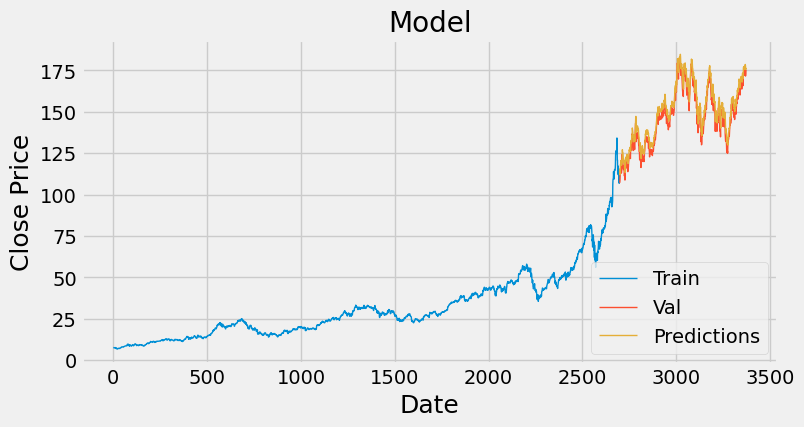

1/1 [==============================] - 0s 35ms/step
Predicted price for the next day: 178.63593
Test Data Accuracy (R-squared): 0.9160845714484847


In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Load the dataset
path = 'AAPL_Stock_Price.csv'
df = pd.read_csv(path)

# Select the 'Close' column as the target variable
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create training dataset
training_data_len = math.ceil(len(dataset) * 0.8)
train_data = scaled_data[0:training_data_len, :]

# Split the data into input (x) and output (y) sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the data for LSTM model (input shape [samples, time steps, features])
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Prepare the test dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the test data to numpy array and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate the RMSE
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(8, 4))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'],linewidth = '1')
plt.plot(valid[['Close', 'Predictions']],linewidth = '1')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Predict the next day's closing price
last_60_days = scaled_data[-60:]
X_test = np.array([last_60_days])
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print("Predicted price for the next day:", pred_price[0][0])

# Evaluate the model on the test data
test_data_accuracy = r2_score(y_test, predictions)
print("Test Data Accuracy (R-squared):", test_data_accuracy)
